# Libraries

In [2]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Data 

In [4]:
rahul = pd.read_csv('rahul_reviews.csv')
modi = pd.read_csv('modi_reviews.csv')

In [5]:
modi.shape

(25688, 3)

In [6]:
rahul.shape

(14261, 3)

# Sentiment Analysis

In [7]:
rahul['Tweet']

0        Wonder why no academic or journalist asks INC ...
1        Congrats for the change #australiavotes2019 an...
2        Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3        @ajaymaken @RahulGandhi And as a final touch, ...
4        #LokSabhaElections2019 Anyone not having mass ...
                               ...                        
14256    @quizzicalguy In this #LokSabhaElections2019, ...
14257    @AnumaVidisha @RahulGandhi @ArvindKejriwal whe...
14258    @sherryontopp Early morning #political move af...
14259    @mayankgandhi04 @mallesh_2004 Early morning #p...
14260    @DrKumarVishwas Early morning #political move ...
Name: Tweet, Length: 14261, dtype: object

In [8]:
modi['Tweet']

0        @anjanaomkashyap I am seeing you as future #bj...
1        #LokSabhaElections2019 \n23rd May 2019 will re...
2        #LokSabhaElections2019 \n23rd May 2019 will re...
3        PM Modi creates a new record of being the only...
4        @abhijitmajumder Appointment of Successor! \n\...
                               ...                        
25683    #1DDrive #ModiSpeaksToNews18 #LokSabhaElection...
25684    I am seriously worried about future of Indian ...
25685    If @narendramodi is so Bad then Why does @INCI...
25686    On this 23rd March (Pakistan Day), I Urge all ...
25687    @timesofindia #ArvindKejriwal, #AAP sirji pls ...
Name: Tweet, Length: 25688, dtype: object

In [9]:
rahul['Tweet'][0]

'Wonder why no academic or journalist asks INC India and Rahul Gandhi a simple question-what danger was there to the original constitution that they changed it more than 100 times in the course of 55 yrs they ruled? #LokSabhaElections2019'

In [10]:
TextBlob(rahul['Tweet'][0]).sentiment

Sentiment(polarity=0.21875, subjectivity=0.4017857142857143)

In [11]:
modi['Tweet'][10]

'#BJP was renamed as Safroon Party then again it was named as Modi Party.\n\ncould any body guess what will be next name of the party...\n\n@asadowaisi @warispathan @syedasimwaqar @aimim_national @shaukat_aimim \n#ModiHaiTohGodseHai #ModiInKedarnath #KejriwalAssassinationClaim'

In [12]:
TextBlob(modi['Tweet'][10]).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [13]:
rahul['Tweet'][10]

'@IYCTelangana @IncBasavakalyan @narendramodi @IYC @INCIndia @RahulGandhi @priyankagandhi @HardikPatel_ @Allavaru @keshavyadaviyc @srinivasiyc @srivatsayb @RakshaRamaiah @JM_Scindia This is called in #BJP language,\n"A Swatch &amp; Swasth Hindutva" !!! This theory not applicable to any other person, except #BJPians! \nQuestion: Demonic possession of !!!!'

In [14]:
TextBlob(rahul['Tweet'][10]).sentiment

Sentiment(polarity=-0.3814697265625, subjectivity=0.375)

# Sentiment Polarity

In [15]:
modi.info()
rahul.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25688 entries, 0 to 25687
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25688 non-null  int64 
 1   User        25683 non-null  object
 2   Tweet       25683 non-null  object
dtypes: int64(1), object(2)
memory usage: 602.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14261 entries, 0 to 14260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14261 non-null  int64 
 1   User        14261 non-null  object
 2   Tweet       14261 non-null  object
dtypes: int64(1), object(2)
memory usage: 334.4+ KB


In [16]:
modi['Tweet'] = modi['Tweet'].astype(str)
rahul['Tweet'] = rahul['Tweet'].astype(str)

In [17]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [18]:
find_polarity('My Phd is going in the right direction')

0.2857142857142857

In [19]:
find_polarity('phd is the wrong way to go')

-0.5

In [20]:
modi['Tweet'].apply(find_polarity)

0        0.350000
1        0.800000
2        0.800000
3        0.312121
4        0.098788
           ...   
25683    0.000000
25684    0.209524
25685   -0.700000
25686    0.000000
25687   -0.213542
Name: Tweet, Length: 25688, dtype: float64

In [21]:
rahul['Tweet'].apply(find_polarity)

0        0.218750
1        0.000000
2        0.000000
3        0.320000
4       -0.166667
           ...   
14256    0.000000
14257   -0.500000
14258    0.080000
14259    0.080000
14260    0.080000
Name: Tweet, Length: 14261, dtype: float64

In [22]:
modi['Polarity'] = modi['Tweet'].apply(find_polarity)
rahul['Polarity'] = rahul['Tweet'].apply(find_polarity)

In [23]:
modi.head()

,Unnamed: 0,User,Tweet,Polarity
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788


In [24]:
rahul.head(9)

,Unnamed: 0,User,Tweet,Polarity
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667
5,5,RGspeak,@INCIndia should release a video of @RahulGand...,0.400000
6,6,SandipGhose,@thakkar_sameet @BDUTT @surjitbhalla 4/n smack...,0.000000
7,7,__Shivampandey,"Rahul Gandhi Spotted in Switzerland, 1 hour ag...",0.350000
8,8,usman_majid1,BJP will be nowhere in India after May 23. BJP...,0.000000


In [25]:
# Modi

modi['Label'] = np.where(modi['Polarity']>0, '+ve', '-ve')
modi.loc[modi['Polarity'] == 0, 'Label'] = '0'


In [26]:
# Rahul

rahul['Label'] = np.where(rahul['Polarity']>0, '+ve', '-ve')
rahul.loc[rahul['Polarity']==0, 'Label'] = '0'

In [27]:
modi.head(30)

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000,+ve
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,+ve
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,+ve
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121,+ve
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788,+ve
5,5,UttarrPradesh,Which of the following should be top priority ...,0.250000,+ve
6,6,Mdsr20351488,After 5yrs of Modi 🙁\n\n-SC vs SC\n-EC vs EC\n...,0.000000,0
7,7,ShaileshWrites,@RenukaJain6\nI still remember your video mass...,-0.500000,-ve
8,8,iamljp,#bjp @BJP4India @INCIndia @INCKarnataka how mu...,-0.342857,-ve
9,9,TheShobhitAzad,#AzadPrediction\n#LokSabhaElections2019 \n\nBJ...,0.000000,0


In [28]:
rahul.head(30)

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750,+ve
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000,0
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000,0
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000,+ve
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667,-ve
5,5,RGspeak,@INCIndia should release a video of @RahulGand...,0.400000,+ve
6,6,SandipGhose,@thakkar_sameet @BDUTT @surjitbhalla 4/n smack...,0.000000,0
7,7,__Shivampandey,"Rahul Gandhi Spotted in Switzerland, 1 hour ag...",0.350000,+ve
8,8,usman_majid1,BJP will be nowhere in India after May 23. BJP...,0.000000,0
9,9,pintoo2060,#Punjab \nBhatinda- cong- Sad neck to neck \n...,-0.175000,-ve


In [29]:
modi.shape

(25688, 5)

In [30]:
rahul.shape

(14261, 5)

# Equalizing Shape 

In [31]:
# modi

np.random.seed(10)
remove_n = 11688
drop_indices = np.random.choice(modi.index, remove_n, replace=False)
df_modi = modi.drop(drop_indices)


In [32]:
# rahul

np.random.seed(10)
remove_n = 261
drop_indices = np.random.choice(rahul.index, remove_n, replace=False)
df_rahul = rahul.drop(drop_indices)

In [33]:
print(df_modi.shape)
print(df_rahul.shape)

(14000, 5)
(14000, 5)


In [34]:
modi

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000,+ve
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,+ve
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,+ve
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121,+ve
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788,+ve
...,...,...,...,...,...
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,0.000000,0
25684,25684,SONUPINKOO,I am seriously worried about future of Indian ...,0.209524,+ve
25685,25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,-0.700000,-ve
25686,25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",0.000000,0


In [35]:
rahul

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750,+ve
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000,0
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000,0
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000,+ve
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667,-ve
...,...,...,...,...,...
14256,14256,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ...",0.000000,0
14257,14257,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,-0.500000,-ve
14258,14258,RAMANKAIRA,@sherryontopp Early morning #political move af...,0.080000,+ve
14259,14259,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0.080000,+ve


# Prediction - Sentiment score (t test)

In [36]:
modi.head()

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000,+ve
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,+ve
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,+ve
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121,+ve
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788,+ve


In [37]:
rahul.head()

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750,+ve
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000,0
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000,0
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000,+ve
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667,-ve


In [38]:
# Normality Assumption

polarity_modi = modi['Polarity']
polarity_rahul = rahul['Polarity']

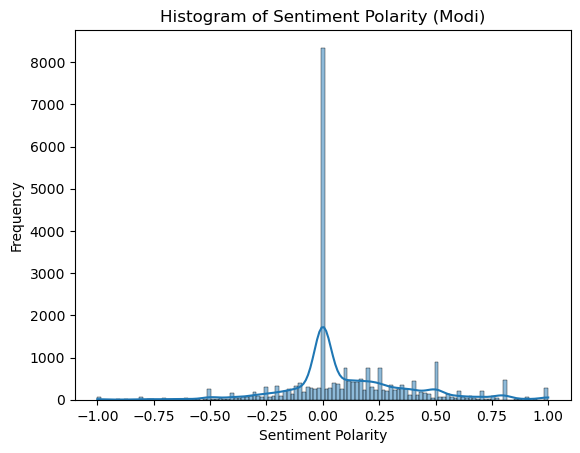

In [39]:

# Plot histogram (polarity_modi)

sns.histplot(polarity_modi, kde=True)
plt.title('Histogram of Sentiment Polarity (Modi)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


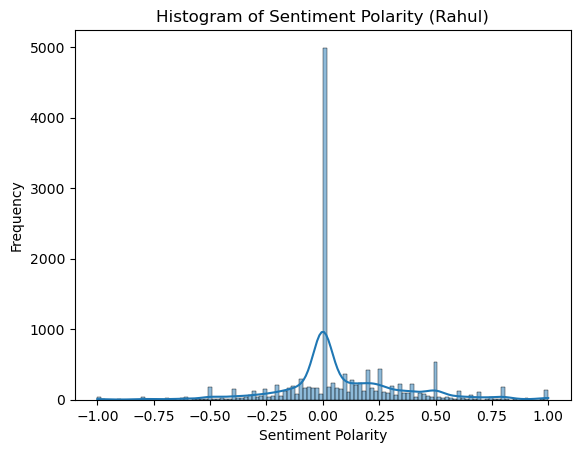

In [40]:
# Plot histogram (polarity_rahul)

sns.histplot(polarity_rahul, kde=True)
plt.title('Histogram of Sentiment Polarity (Rahul)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [41]:
ttest_polarity = ttest_ind(polarity_modi, polarity_rahul)

In [42]:
ttest_polarity

TtestResult(statistic=9.424881864986473, pvalue=4.528536915237328e-21, df=39947.0)

# Prediction - Sentiment score (removing neutrals)

In [43]:
neutral_modi = modi[modi['Label'] == '0']
neutral_modi

,Unnamed: 0,User,Tweet,Polarity,Label
6,6,Mdsr20351488,After 5yrs of Modi 🙁\n\n-SC vs SC\n-EC vs EC\n...,0.0,0
9,9,TheShobhitAzad,#AzadPrediction\n#LokSabhaElections2019 \n\nBJ...,0.0,0
10,10,sheikh541,#BJP was renamed as Safroon Party then again i...,0.0,0
20,20,UdayiCODE,I am seeing 3 Options for PM this time #Modi #...,0.0,0
21,21,SandipGhose,@thakkar_sameet @BDUTT @surjitbhalla 4/n smack...,0.0,0
...,...,...,...,...,...
25674,25674,CrazySatire,Poll:\nWhich province (s) of Pakistan after di...,0.0,0
25676,25676,SunjayJK,@IASassociation MT:We stand by our @IPS_Associ...,0.0,0
25682,25682,CrazySatire,No one calling that ‘BJP is communal’ in this ...,0.0,0
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,0.0,0


In [44]:
remove_neutral_modi = modi['Polarity'].isin(neutral_modi['Polarity'])
modi.drop(modi[remove_neutral_modi].index,inplace=True)

In [45]:
print(neutral_modi.shape)
print(modi.shape)

(8206, 5)
(17482, 5)


In [46]:
neutral_rahul = rahul[rahul['Label'] == '0']
neutral_rahul

,Unnamed: 0,User,Tweet,Polarity,Label
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.0,0
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.0,0
6,6,SandipGhose,@thakkar_sameet @BDUTT @surjitbhalla 4/n smack...,0.0,0
8,8,usman_majid1,BJP will be nowhere in India after May 23. BJP...,0.0,0
12,12,mayursejpal,My Predictions\n\nBJP+NDA = 300 to 310\nCongre...,0.0,0
...,...,...,...,...,...
14238,14238,vishantsarkar,@RahulGandhi The year has come 2019 when Natio...,0.0,0
14240,14240,CrazySatire,@nmannathukkaren @ShashiTharoor Modi’s fate wi...,0.0,0
14252,14252,CrazySatire,No one calling that ‘BJP is communal’ in this ...,0.0,0
14255,14255,SONUPINKOO,I need Answer from @INCIndia @RahulGandhi @_Ma...,0.0,0


In [47]:
remove_neutral_rahul = rahul['Polarity'].isin(neutral_rahul['Polarity'])
rahul.drop(rahul[remove_neutral_rahul].index,inplace=True)

In [48]:
print(neutral_rahul.shape)
print(rahul.shape)

(4894, 5)
(9367, 5)


In [49]:
print(modi.shape)
print(rahul.shape)

(17482, 5)
(9367, 5)


In [50]:
# modi

np.random.seed(10)
remove_n = 8481
drop_indices = np.random.choice(modi.index, remove_n, replace=False)
df_modi = modi.drop(drop_indices)
print(df_modi.shape)

(9001, 5)


In [51]:
# rahul

np.random.seed(10)
remove_n = 367
drop_indices = np.random.choice(rahul.index, remove_n, replace=False)
df_rahul = rahul.drop(drop_indices)
print(df_rahul.shape)

(9000, 5)


In [52]:
print(df_modi.shape)
print(df_rahul.shape)

(9001, 5)
(9000, 5)


In [53]:
# Normality Assumption

polarity_df_modi = df_modi['Polarity']
polarity_df_rahul = df_rahul['Polarity']

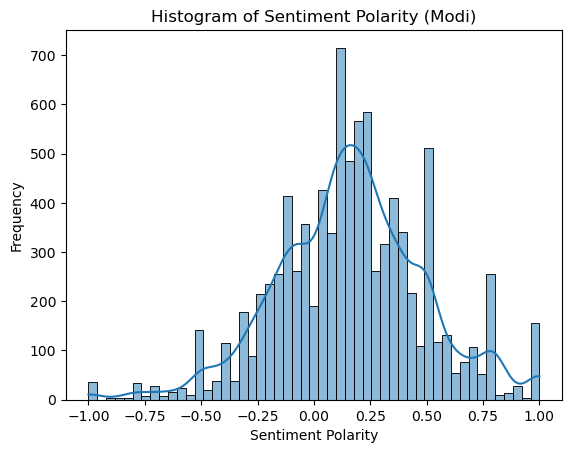

In [54]:
# Plot histogram (polarity_df_modi)

sns.histplot(polarity_df_modi, kde=True)
plt.title('Histogram of Sentiment Polarity (Modi)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


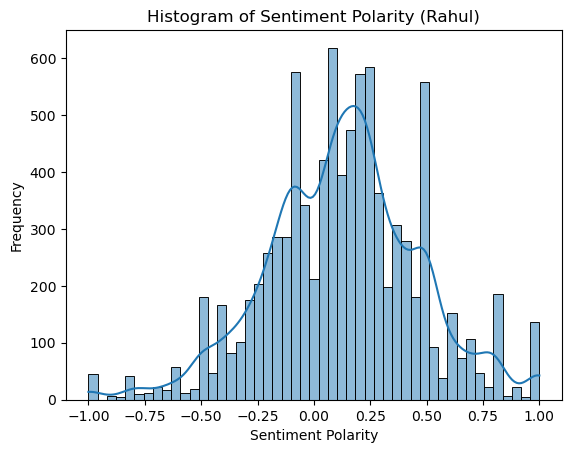

In [55]:
# Plot histogram (polarity_df_rahul)

sns.histplot(polarity_df_rahul, kde=True)
plt.title('Histogram of Sentiment Polarity (Rahul)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [56]:
ttest_df_polarity = ttest_ind(polarity_df_modi, polarity_df_rahul)
print(ttest_df_polarity)

TtestResult(statistic=7.071767261143924, pvalue=1.5858795889628314e-12, df=17999.0)
